### 서울시 CCTV - 인구 시각화

In [20]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [21]:
df = pd.read_csv('../02.Pandas/data/서울시 구별 CCTV 인구 현황.csv', index_col='구별')
df.head()

,2014년 이전,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,,
종로구,553,1835,40.60,152212,141060,11152,28265,7.33,18.57
중구,217,2584,55.80,131390,120963,10427,25353,7.94,19.30
용산구,87,2970,65.52,232482,217756,14726,39478,6.33,16.98
성동구,157,4040,54.06,287240,280240,7000,48238,2.44,16.79
광진구,130,3480,68.19,350925,336801,14124,54854,4.02,15.63


#### 1. 자치구별 CCTV 설치 댓수

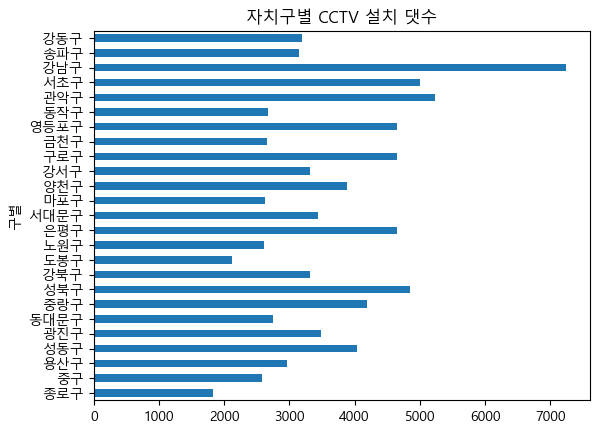

In [22]:
df['CCTV댓수'].plot(kind='barh')   # Series.plot()
plt.title('자치구별 CCTV 설치 댓수')
plt.show()

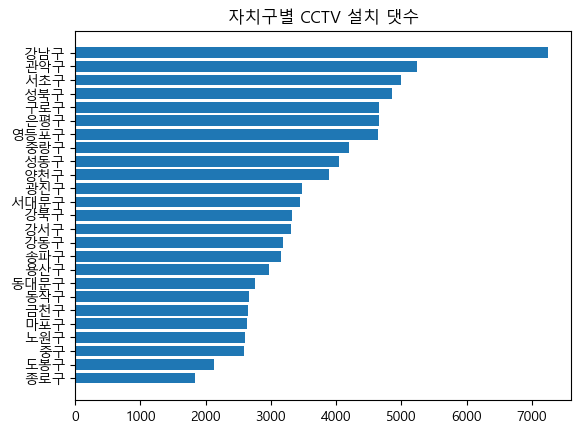

In [23]:
# CCTV 댓수로 정렬하고, plt.barh()로 차트 그리기
sc = df['CCTV댓수'].sort_values()
plt.barh(sc.index, sc)
plt.title('자치구별 CCTV 설치 댓수')
plt.show()


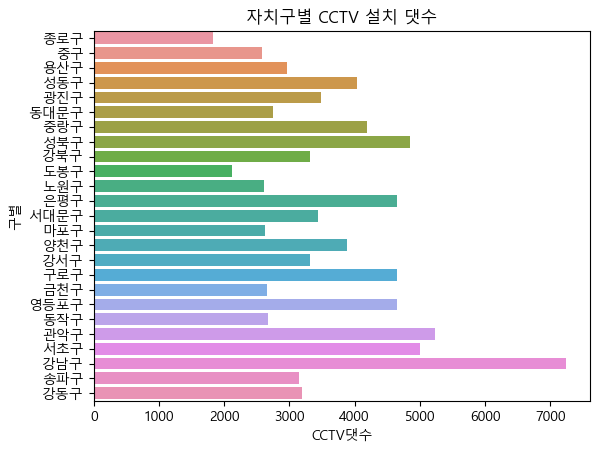

In [24]:
# Seaborn으로 
sns.barplot(x=df['CCTV댓수'], y=df.index)
plt.title('자치구별 CCTV 설치 댓수')
plt.show()

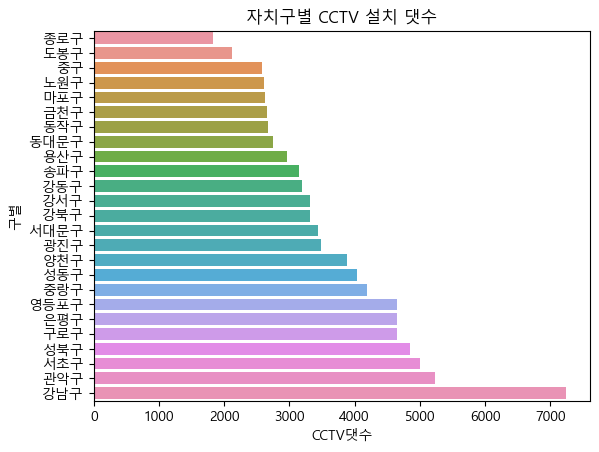

In [25]:
sns.barplot(y=sc.index, x=sc)
plt.title('자치구별 CCTV 설치 댓수')
plt.show()

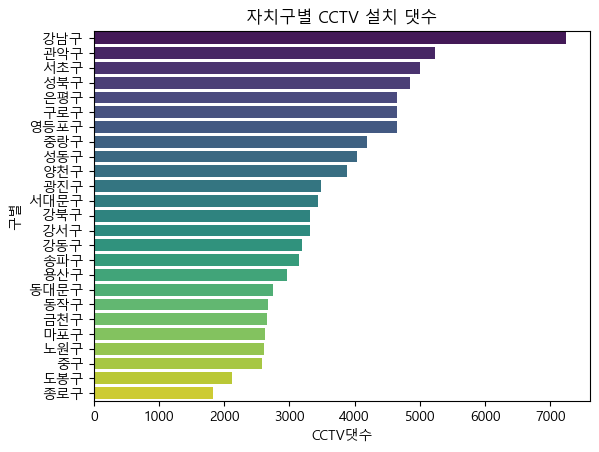

In [26]:
scr = df['CCTV댓수'].sort_values(ascending=False)
sns.barplot(y=scr.index, x=scr, palette="viridis")
plt.title('자치구별 CCTV 설치 댓수')
plt.show()

#### 2. 구별 인당 CCTV 댓수 그리기 - plt.barh()

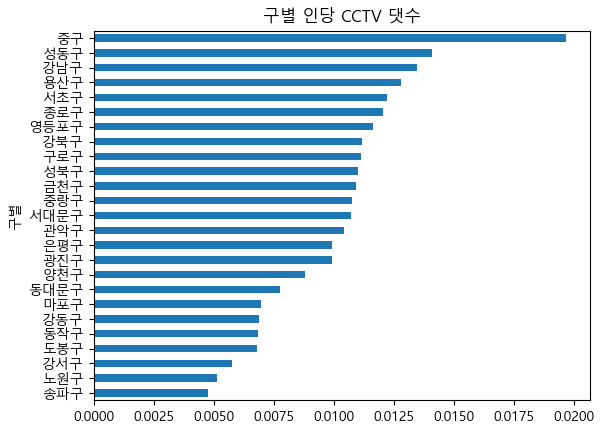

In [27]:
(df['CCTV댓수'] / df['인구수']).sort_values().plot(kind='barh')
plt.title('구별 인당 CCTV 댓수')
plt.show()


#### 3. 구별 외국인당 CCTV 댓수 - Seaborn

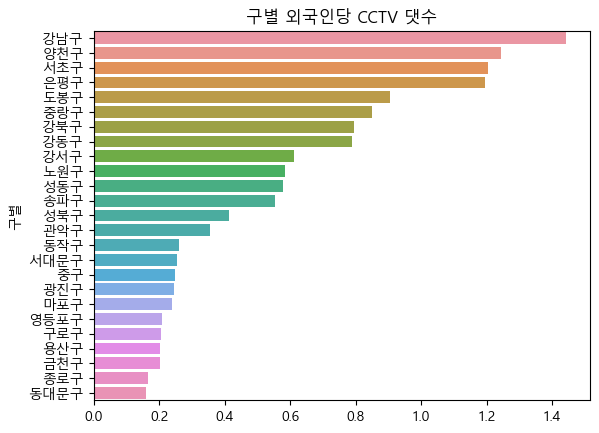

In [28]:
s = (df['CCTV댓수'] / df['외국인']).sort_values(ascending=False)
sns.barplot(x=s.values, y=s.index)
plt.title('구별 외국인당 CCTV 댓수')
plt.show()

#### 4. 인구수와 CCTV 댓수 분석

- 산점도

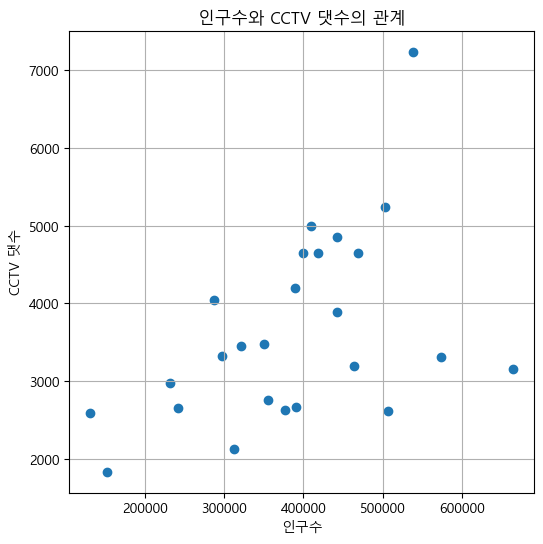

In [29]:
plt.figure(figsize=(6, 6))
plt.scatter(df['인구수'], df['CCTV댓수'])
plt.title('인구수와 CCTV 댓수의 관계')
plt.grid(), plt.xlabel('인구수'), plt.ylabel('CCTV 댓수')
plt.show()

- 회귀선

In [53]:
fp1 = np.polyfit(df['인구수'], df['CCTV댓수'], 1)
fp1, fp1[0], fp1[1]   # [기울기, 절편]

(array([4.52184187e-03, 1.89611186e+03]),
 0.004521841872046283,
 1896.1118642528622)

In [33]:
fx = np.array([100000, 700000])
fy = fx * fp1[0] + fp1[1]
fy

array([2348.29605146, 5061.40117469])

In [35]:
f1 = np.poly1d(fp1)
fy = f1(fx)
fy

array([2348.29605146, 5061.40117469])

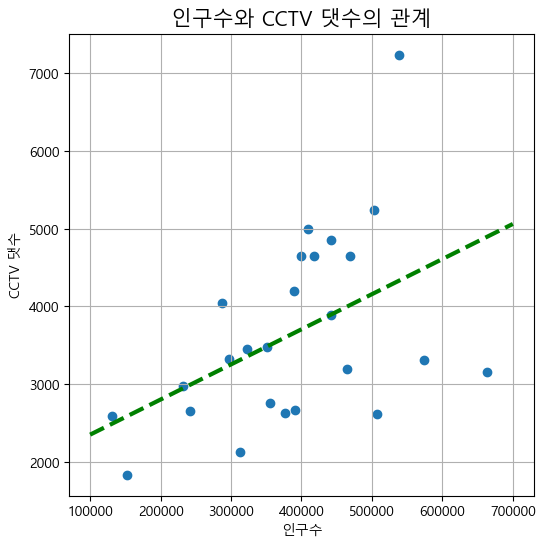

In [34]:
plt.figure(figsize=(6, 6))
plt.scatter(df['인구수'], df['CCTV댓수'])
plt.plot(fx, fy, 'g--', lw=3)
plt.title('인구수와 CCTV 댓수의 관계', fontsize=15)
plt.grid(), plt.xlabel('인구수'), plt.ylabel('CCTV 댓수')
plt.show()

-오차의 절대값

In [37]:
df['오차'] = abs(df['CCTV댓수'] - f1(df['인구수'])).round(1)
df.head(3)

,2014년 이전,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,오차
구별,,,,,,,,,,
종로구,553,1835,40.60,152212,141060,11152,28265,7.33,18.57,749.4
중구,217,2584,55.80,131390,120963,10427,25353,7.94,19.30,93.8
용산구,87,2970,65.52,232482,217756,14726,39478,6.33,16.98,22.6


In [38]:
# 오차의 내림차순으로 정렬
df.sort_values(by='오차', ascending=False).head(3)

,2014년 이전,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,오차
구별,,,,,,,,,,
강남구,121,7243,47.48,537817,532798,5019,83097,0.93,15.45,2915.0
송파구,149,3154,75.94,663704,658006,5698,105161,0.86,15.84,1743.3
노원구,238,2608,49.31,506989,502515,4474,93279,0.88,18.40,1580.6


In [39]:
# 정렬된 데이터에서 Top 10만 골라내기
df_sort = df.sort_values(by='오차', ascending=False).head(10)
df_sort

,2014년 이전,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,오차
구별,,,,,,,,,,
강남구,121,7243,47.48,537817,532798,5019,83097,0.93,15.45,2915.0
송파구,149,3154,75.94,663704,658006,5698,105161,0.86,15.84,1743.3
노원구,238,2608,49.31,506989,502515,4474,93279,0.88,18.40,1580.6
서초구,160,4995,52.73,408979,404831,4148,63328,1.01,15.48,1249.5
도봉구,98,2126,81.84,312858,310509,2349,68114,0.75,21.77,1184.8
강서구,132,3312,63.83,573711,568287,5424,98659,0.95,17.20,1178.3
관악구,592,5239,50.39,502628,487815,14813,83420,2.95,16.60,1070.1
동작구,88,2664,54.28,390377,380201,10176,68766,2.61,17.62,997.3
마포구,61,2628,55.33,376542,365570,10972,56582,2.91,15.03,970.8


- 최종 그림

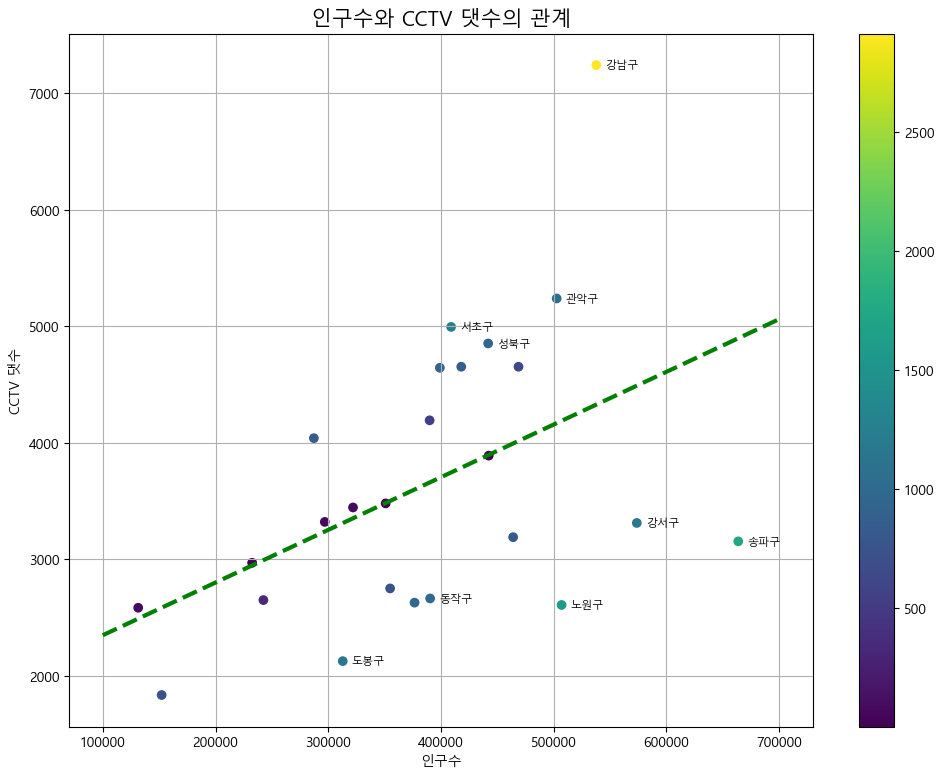

In [52]:
plt.figure(figsize=(12, 9))
plt.scatter(df['인구수'], df['CCTV댓수'], c=df['오차'])
plt.plot(fx, fy, 'g--', lw=3)

for i in range(10):
    if i == 8:
        continue
    plt.text(df_sort['인구수'][i]+8000, df_sort['CCTV댓수'][i]-30, df_sort.index[i], fontsize=8)

plt.title('인구수와 CCTV 댓수의 관계', fontsize=15)
plt.grid(), plt.xlabel('인구수'), plt.ylabel('CCTV 댓수')
plt.colorbar()
plt.show()